In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import time

trainset = pd.read_excel('traindata.xlsx', header = 0)
X_train = trainset.iloc[:,:-1]
y_train = trainset.iloc[:,-1]



In [4]:
start = time.process_time()
I = np.eye(11)
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='random_normal', input_dim=128))
model.add(Dense(11, activation='softmax', kernel_initializer='random_normal'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, I[y_train,:], epochs = 100, batch_size = 100)
end = time.process_time()
train_time = end - start
print("Training time: ", train_time)

Epoch 1/100
577/577 [==============================] - 1s 677us/step - loss: 0.9912 - accuracy: 0.7146
Epoch 2/100
577/577 [==============================] - 0s 669us/step - loss: 0.5973 - accuracy: 0.7151
Epoch 3/100
577/577 [==============================] - 0s 687us/step - loss: 0.5936 - accuracy: 0.7173
Epoch 4/100
577/577 [==============================] - 0s 725us/step - loss: 0.5962 - accuracy: 0.7138
Epoch 5/100
577/577 [==============================] - 0s 750us/step - loss: 0.5973 - accuracy: 0.7124
Epoch 6/100
577/577 [==============================] - 0s 848us/step - loss: 0.5948 - accuracy: 0.7143
Epoch 7/100
577/577 [==============================] - 0s 759us/step - loss: 0.5943 - accuracy: 0.7142
Epoch 8/100
577/577 [==============================] - 0s 750us/step - loss: 0.5961 - accuracy: 0.7124
Epoch 9/100
577/577 [==============================] - 0s 672us/step - loss: 0.5965 - accuracy: 0.7107
Epoch 10/100
577/577 [==============================] - 0s 679us/step - l

577/577 [==============================] - 0s 741us/step - loss: 0.5858 - accuracy: 0.7138
Epoch 80/100
577/577 [==============================] - 0s 675us/step - loss: 0.5843 - accuracy: 0.7163
Epoch 81/100
577/577 [==============================] - 0s 628us/step - loss: 0.5820 - accuracy: 0.7173
Epoch 82/100
577/577 [==============================] - 0s 680us/step - loss: 0.5821 - accuracy: 0.7170
Epoch 83/100
577/577 [==============================] - 0s 742us/step - loss: 0.5841 - accuracy: 0.7147
Epoch 84/100
577/577 [==============================] - 0s 700us/step - loss: 0.5834 - accuracy: 0.7146
Epoch 85/100
577/577 [==============================] - 0s 765us/step - loss: 0.5840 - accuracy: 0.7152
Epoch 86/100
577/577 [==============================] - 1s 940us/step - loss: 0.5846 - accuracy: 0.7136
Epoch 87/100
577/577 [==============================] - 0s 677us/step - loss: 0.5844 - accuracy: 0.7146
Epoch 88/100
577/577 [==============================] - 0s 608us/step - loss:

In [5]:
testset = pd.read_excel('testdata.xlsx', header = 0)
X_test = testset.iloc[:,:-1]
y_test = testset.iloc[:,-1]
test_sample = np.size(y_test,0)
start = time.process_time()
y_pred = model.predict(X_test)
y = np.argmax(y_pred, 1)
end = time.process_time()
test_time = end - start
print("Detect time: ", test_time)
acc = sum(y==y_test)/test_sample
cm2 = confusion_matrix(y_test, y)

Detect time:  0.46875


In [6]:
print("Acc = ",acc)


Acc =  0.7157127991675338


# SHAP

In [8]:
import shap

shap.initjs()
explainer = shap.KernelExplainer(model.predict, X_train[0:100])
shap_values = explainer.shap_values(X_test[0:50])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[0:50])

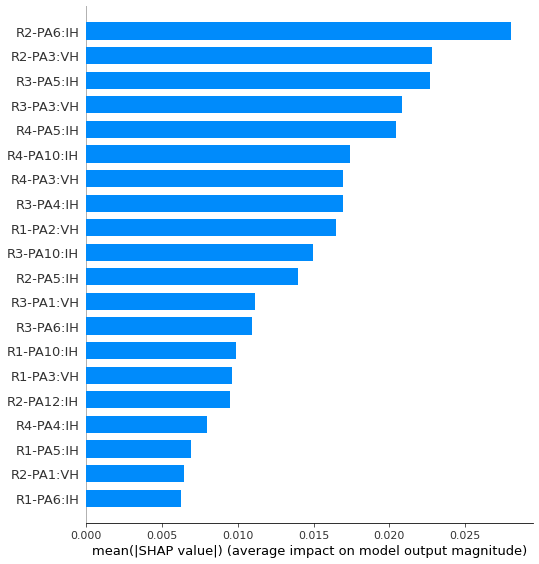

In [9]:
shap.summary_plot(shap_values[0], X_train.values, plot_type="bar", feature_names = X_train.columns)

In [10]:
i=49
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test.values[i], feature_names = X_test.columns)

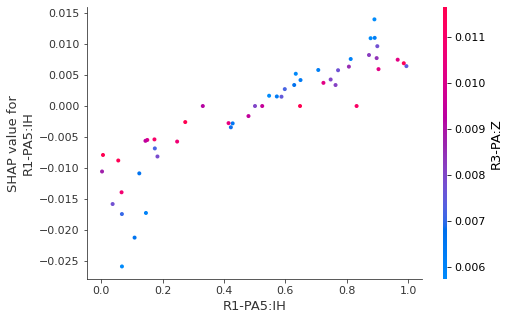

In [11]:
shap.dependence_plot(8, shap_values[0], X_test[0:50].values, feature_names=X_train.columns)